In [1]:
import pandas as pd 
import numpy as np 

from tensorflow import keras
import tensorflow as tf

import os

import soundfile as sf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

2023-07-27 15:46:46.747957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## RNN - Bidirectional LTSM (forward/backward)
### LTSM (Long Short Term Memory)

# model - Sequential()
# model.add(LTSM(128))
# model.add(Dense(n_class, softmax))

# memory = gated rnns (hidden state)

In [3]:
# get information for rnn from melspectogram

In [4]:
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/jazz/jazz_11.wav')

n_fft = 1024

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, win_length=n_fft, hop_length=4096, n_mels=138)


In [5]:
y

array([ 0.09569635,  0.05452875, -0.09993939, ...,  0.43043715,
        0.40674227,  0.35309538], dtype=float32)

In [6]:
mel_spec.shape

(138, 162)

In [7]:
melspec_df = pd.DataFrame(mel_spec)
melspec_df

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,2.767703,1.057379,0.068361,1.002038,0.166895,3.471780,0.151184,0.083394,2.363258,2.829429,...,0.435542,0.080781,0.143185,0.061396,0.142760,0.114670,0.218902,0.069323,0.189568,0.127000
1,4.696153,15.582161,2.150522,4.737359,1.442498,9.670377,4.388105,0.531509,10.130751,14.896755,...,4.656778,1.767607,3.586769,2.161380,3.198009,2.847654,3.127251,0.941415,1.342986,3.165994
2,5.517553,130.896271,24.924768,27.615721,40.643230,8.468103,15.500473,6.961605,11.380487,14.683178,...,11.176293,6.040844,9.535484,6.669768,9.901625,9.539266,7.464093,2.200504,3.758774,10.255269
3,3.681101,215.307953,43.149033,56.000126,103.481720,8.810317,11.018085,20.833042,37.720299,11.079391,...,9.125995,6.677549,5.670302,7.484568,8.300022,5.554327,4.649749,0.993671,3.122483,5.670397
4,1.652678,68.822327,12.728340,27.634542,49.190979,1.884288,1.146782,31.568834,35.592655,8.399189,...,12.138541,4.396974,4.624025,10.276848,10.708907,7.451389,6.879978,1.500618,5.503044,8.801167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.000345,0.000808,0.000271,0.000922,0.000645,0.006384,0.000361,0.000805,0.000331,0.001183,...,0.004887,0.003770,0.010500,0.004959,0.000332,0.000193,0.000286,0.000273,0.002479,0.000415
134,0.000702,0.000685,0.000591,0.001106,0.000320,0.004233,0.000495,0.000592,0.000432,0.000445,...,0.001669,0.000884,0.001894,0.001771,0.000259,0.000251,0.000332,0.000376,0.002782,0.001178
135,0.000264,0.000795,0.000243,0.000869,0.000350,0.003687,0.000357,0.000860,0.000134,0.000287,...,0.000682,0.000474,0.001744,0.000519,0.000263,0.000099,0.000170,0.000348,0.002022,0.000888
136,0.000329,0.000328,0.000139,0.000109,0.000176,0.002876,0.000152,0.000373,0.000248,0.000144,...,0.000285,0.000242,0.000676,0.000341,0.000173,0.000079,0.000108,0.000294,0.000252,0.000205


[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

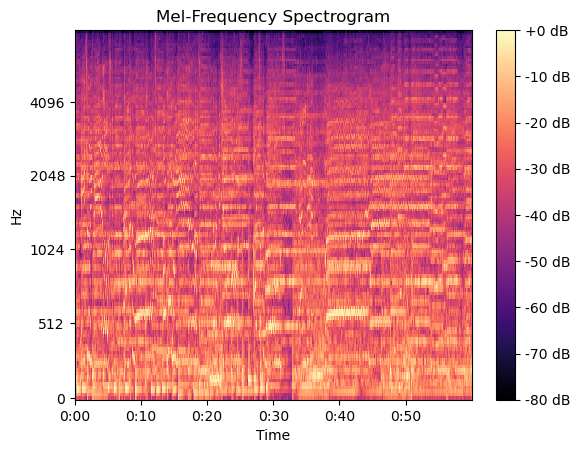

In [8]:
# Jazz Audio

J = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 256, n_mels = 128)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(J, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [9]:
# Rock Audio
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/rock/rock_40.wav')


[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

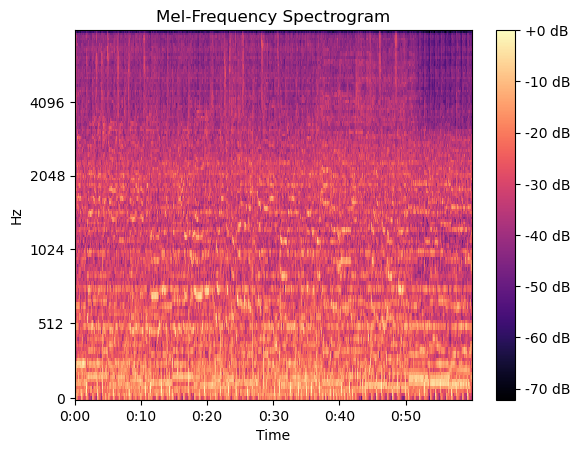

In [10]:
R = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =4096, win_length = n_fft,
                                   hop_length = 256, n_mels = 128)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(R, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [11]:
#Classical Audio 
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/classical/classical_33.wav')

[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

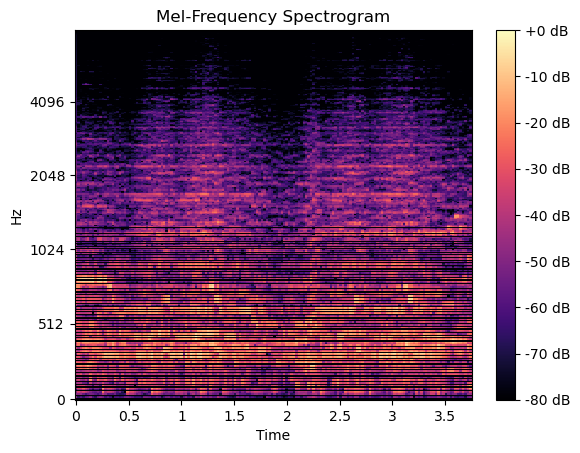

In [12]:
C = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 4096, n_mels = 500)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(C, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [50]:
def melspec_features(audio_path, sr=22050, n_mels=60, hop_length=500, n_frames=1, n_fft=1024):

    #loading audio file
    y, sr = librosa.load(audio_path)  
    #creating melspec feature
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = n_fft,
                                          hop_length = hop_length, n_mels = n_mels)
    #normalizing mel spectrogram
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    #pad/truncating to ensure all audio samples have the same length prior to running through the model
    mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, max(0, n_frames - mel_spectrogram.shape[1]))), 
                             mode='constant')
    mel_spectrogram = mel_spectrogram[:, :n_frames]
    
    return mel_spectrogram

In [51]:
def load_audio_files(data_dir, genres):

    all_mel_spectrograms = []
    all_labels = []

    for genre_index, genre in enumerate(genres):
        genre_dir = os.path.join(directory, genre)
        audio_files = os.listdir(genre_dir)

        for audio_file in audio_files:
            audio_path = os.path.join(genre_dir, audio_file)
            
            if os.path.isfile(audio_path) and audio_file.lower().endswith(('.wav')):
                mel_spectrogram = melspec_features(audio_path)


                all_mel_spectrograms.append(mel_spectrogram)
                all_labels.append(genre_index)


    all_mel_spectrograms = np.array(all_mel_spectrograms)
    all_labels = np.array(all_labels)

    return all_mel_spectrograms, all_labels

In [52]:
directory = '/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original'
genres = ['blues', 'classical', 'country', 'disco','hiphop', 'jazz','metal', 'pop', 'reggae', 'rock']

all_mel_spectrograms, all_labels = load_audio_files(directory, genres)

In [53]:
reshaped_mel_spectrograms = [mel_spectrogram.ravel() for mel_spectrogram in all_mel_spectrograms]

spectrogram_series = [pd.Series(mel_spectrogram) for mel_spectrogram in reshaped_mel_spectrograms]

df = pd.concat([pd.DataFrame(spectrogram_series), pd.Series(all_labels, name='label')], axis=1)

In [54]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,-20.919781,-22.740898,-20.537037,-19.544350,-28.761635,-38.424126,-30.859407,-28.522877,-28.454803,-26.809427,...,-60.689667,-61.533607,-63.218742,-63.013481,-65.267418,-66.211342,-65.287048,-63.363525,-66.018158,0
1,-40.514450,-41.184071,-43.555969,-39.731709,-39.444092,-36.074718,-38.200161,-44.400009,-36.024033,-34.188957,...,-75.877052,-76.676376,-77.345093,-78.011597,-78.753914,-79.088600,-79.906357,-80.000000,-80.000000,0
2,-35.603378,-29.340725,-27.864073,-26.875790,-23.284019,-25.940580,-28.359039,-31.815910,-31.811863,-25.382362,...,-57.500763,-61.300941,-62.738972,-66.200722,-65.289703,-67.595093,-69.441589,-70.002373,-71.462692,0
3,-12.025496,-7.007732,-15.098199,-23.855801,-27.441547,-28.722282,-20.420790,-11.663391,-15.553901,-25.100624,...,-60.023827,-59.560036,-61.275108,-60.370667,-63.271645,-63.829758,-62.513172,-63.992699,-65.874138,0
4,-19.887344,-25.182056,-30.348301,-30.760517,-32.882107,-27.784851,-25.014694,-20.609150,-15.625026,-18.769354,...,-60.965508,-62.491005,-62.735107,-63.776878,-64.374580,-64.680832,-66.239632,-67.363625,-69.458015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,-16.815580,-15.973896,-17.585579,-14.782335,-14.454931,-18.921629,-19.213100,-19.719212,-21.736517,-23.497444,...,-35.754154,-39.876106,-42.653320,-42.609028,-41.788055,-42.705383,-42.096291,-43.811783,-48.989433,9
1728,-10.810326,-10.777885,-15.150976,-17.091164,-19.849176,-22.130739,-17.102774,-17.924225,-17.330975,-20.284376,...,-52.026829,-53.911263,-56.248047,-53.136612,-56.669456,-55.265633,-54.229500,-57.328911,-62.023499,9
1729,-27.915371,-17.551838,-14.803434,-12.717667,-10.790535,-11.806293,-21.435484,-19.172501,-15.799137,-19.886204,...,-40.557362,-37.792702,-37.824440,-37.807121,-41.581841,-50.705860,-58.902115,-65.284470,-67.442749,9
1730,-8.085486,-8.056174,-11.807350,-8.084567,-13.778956,-21.275976,-21.924669,-20.854601,-28.473431,-31.441259,...,-45.620087,-46.837288,-47.307011,-49.238445,-51.554359,-52.525986,-53.139313,-53.756546,-56.986290,9


In [55]:
df['label'].value_counts()

0    206
2    204
4    201
7    201
9    200
6    191
1    137
3    136
8    133
5    123
Name: label, dtype: int64

In [56]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .15, random_state = 42)

In [101]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(np.array(X_train, dtype = float))
X_val_sc = scaler.transform(np.array(X_val, dtype = float))
X_test_sc = scaler.transform(np.array(X_test, dtype = float))

In [102]:
X_train_reshaped = X_train_sc.reshape((X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_reshaped = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])
X_val_reshaped = X_val_sc.reshape(X_val_sc.shape[0], 1, X_val_sc.shape[1])

In [103]:
X_train_sc.shape

(1030, 60)

In [104]:
X_train_reshaped.shape

(1030, 1, 60)

In [105]:
y_train.shape

(1030,)

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_sc.shape[1], 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=32, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [112]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_sc, y_train, epochs=100, batch_size=75, validation_data=(X_val_sc, y_val))

Epoch 1/100
14/14 [==============================] - 8s 230ms/step - loss: 2.2055 - accuracy: 0.1660 - val_loss: 2.1803 - val_accuracy: 0.1538
Epoch 2/100
14/14 [==============================] - 2s 168ms/step - loss: 2.1537 - accuracy: 0.2194 - val_loss: 2.1393 - val_accuracy: 0.2088
Epoch 3/100
14/14 [==============================] - 2s 167ms/step - loss: 2.1559 - accuracy: 0.2291 - val_loss: 2.1427 - val_accuracy: 0.1703
Epoch 4/100
14/14 [==============================] - 2s 168ms/step - loss: 2.1288 - accuracy: 0.2311 - val_loss: 2.1117 - val_accuracy: 0.2418
Epoch 5/100
14/14 [==============================] - 2s 165ms/step - loss: 2.1085 - accuracy: 0.2476 - val_loss: 2.0946 - val_accuracy: 0.2527
Epoch 6/100
14/14 [==============================] - 2s 165ms/step - loss: 2.0882 - accuracy: 0.2398 - val_loss: 2.0874 - val_accuracy: 0.2582
Epoch 7/100
14/14 [==============================] - 2s 165ms/step - loss: 2.0967 - accuracy: 0.2515 - val_loss: 2.0962 - val_accuracy: 0.2033

Epoch 58/100
14/14 [==============================] - 2s 169ms/step - loss: 1.7897 - accuracy: 0.3621 - val_loss: 2.0681 - val_accuracy: 0.2527
Epoch 59/100
14/14 [==============================] - 2s 167ms/step - loss: 1.7474 - accuracy: 0.3767 - val_loss: 2.0830 - val_accuracy: 0.2637
Epoch 60/100
14/14 [==============================] - 2s 164ms/step - loss: 1.7321 - accuracy: 0.3806 - val_loss: 2.1030 - val_accuracy: 0.2473
Epoch 61/100
14/14 [==============================] - 2s 163ms/step - loss: 1.7568 - accuracy: 0.3660 - val_loss: 2.1494 - val_accuracy: 0.2747
Epoch 62/100
14/14 [==============================] - 2s 168ms/step - loss: 1.7142 - accuracy: 0.3835 - val_loss: 2.0935 - val_accuracy: 0.2637
Epoch 63/100
14/14 [==============================] - 2s 165ms/step - loss: 1.7659 - accuracy: 0.3777 - val_loss: 2.0903 - val_accuracy: 0.2747
Epoch 64/100
14/14 [==============================] - 2s 165ms/step - loss: 1.7130 - accuracy: 0.3883 - val_loss: 2.1229 - val_accuracy:

In [113]:
loss, accuracy = model.evaluate(X_train_sc, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")

33/33 [==============================] - 1s 33ms/step - loss: 1.2218 - accuracy: 0.5816
:loss: 1.22184157371521, accuracy: 0.5815533995628357


In [114]:
test_loss = model.evaluate(X_val_sc, y_val)

# Print the evaluation result
print(f'Test Loss: {test_loss}')

6/6 [==============================] - 0s 32ms/step - loss: 2.3646 - accuracy: 0.2527
Test Loss: [2.3646445274353027, 0.2527472674846649]


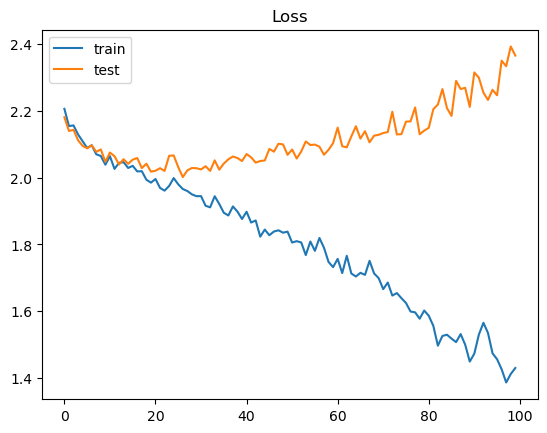

In [115]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

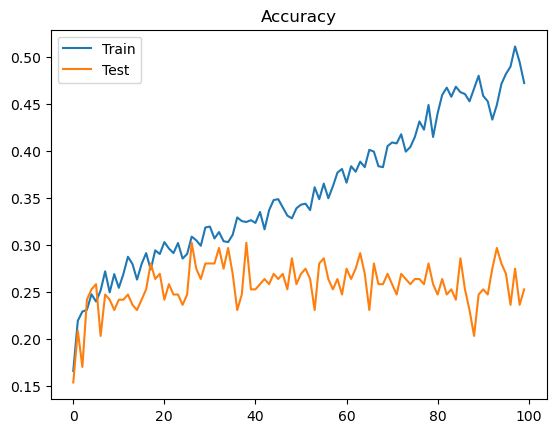

In [116]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()